## Traffic Analysis and Forecasting


### Import packages

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline


### Load datasets

In [2]:
file_url = "https://drive.google.com/uc?id=1CKKoa9mb8ElLCREpS7Onh2zv1RxhEDlg"

# Load the CSV file into pandas (local file)
df = pd.read_csv('vehicles.csv', parse_dates=['DateTime'])

# Display the first 5 rows
df.head()


,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [3]:
# Display the first 20 rows
df.head(20)

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9
5,2015-11-01 05:00:00,6
6,2015-11-01 06:00:00,9
7,2015-11-01 07:00:00,8
8,2015-11-01 08:00:00,11
9,2015-11-01 09:00:00,12


### Explore the Datasets

In [4]:
## Check if there is any missing data or not
df.isnull()

,DateTime,Vehicles
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
14587,False,False
14588,False,False
14589,False,False
14590,False,False


In [5]:
## Check the data types
df.dtypes

DateTime    datetime64[ns]
Vehicles             int64
dtype: object

In [6]:
## Check the summary statistics of numerical columns
df.describe()

,DateTime,Vehicles
count,14592,14592.000000
mean,2016-08-30 23:30:00,45.052906
min,2015-11-01 00:00:00,5.000000
25%,2016-03-31 23:45:00,27.000000
50%,2016-08-30 23:30:00,40.000000
75%,2017-01-29 23:15:00,59.000000
max,2017-06-30 23:00:00,156.000000
std,NaN,23.008345


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  14592 non-null  datetime64[ns]
 1   Vehicles  14592 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 228.1 KB


### Check if all the required data is available
In time series data, the data must be recorded in equal interval of time, but sometime there is missing data which is not found using `df.isnull()` functionality.

In this cases, we have different approaches to do it.


In this datasets, there is no any missing hours. We will simulate missing data by dropping a row. And, resample to make the hourly data.

After this we will have a missing records and fill the missing records using various averaging technique

In [8]:
## Use Pandas .to_datetime to ensure datatype is datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  14592 non-null  datetime64[ns]
 1   Vehicles  14592 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 228.1 KB


In [10]:
date_time_index = pd.date_range(df['DateTime'].min(), df['DateTime'].max(), freq='h')
date_time_index

DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2015-11-01 03:00:00',
               '2015-11-01 04:00:00', '2015-11-01 05:00:00',
               '2015-11-01 06:00:00', '2015-11-01 07:00:00',
               '2015-11-01 08:00:00', '2015-11-01 09:00:00',
               ...
               '2017-06-30 14:00:00', '2017-06-30 15:00:00',
               '2017-06-30 16:00:00', '2017-06-30 17:00:00',
               '2017-06-30 18:00:00', '2017-06-30 19:00:00',
               '2017-06-30 20:00:00', '2017-06-30 21:00:00',
               '2017-06-30 22:00:00', '2017-06-30 23:00:00'],
              dtype='datetime64[ns]', length=14592, freq='h')

In [11]:
assert len(date_time_index) == len(df), "Some missing DateTime in dataframe"

In [12]:
## Set DateTime as index
df.set_index('DateTime', inplace=True)
df.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14592 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vehicles  14592 non-null  int64
dtypes: int64(1)
memory usage: 228.0 KB


In [14]:
## Resample the datasets to hourly frequency, and check if there is any missing hours
resampled_df = df.resample('H').asfreq()

## Check if there is any missing hours
resampled_df.isnull().sum()

C:\Users\acer\AppData\Local\Temp\ipykernel_15896\3052451357.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_df = df.resample('H').asfreq()


Vehicles    0
dtype: int64

In [15]:
resampled_df.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


In [16]:
df.drop(index='2015-12-01 02:00:00', inplace=True)
df.drop(index='2015-12-01 03:00:00', inplace=True)
df.drop(index='2015-12-01 04:00:00', inplace=True)
df

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9
...,...
2017-06-30 19:00:00,105
2017-06-30 20:00:00,96
2017-06-30 21:00:00,90


In [17]:
resampled_df = df.resample('H').asfreq()
## Check if there is any missing hours
resampled_df.isnull().sum()

C:\Users\acer\AppData\Local\Temp\ipykernel_15896\2679470305.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_df = df.resample('H').asfreq()


Vehicles    3
dtype: int64

In [18]:
resampled_df.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15.0
2015-11-01 01:00:00,13.0
2015-11-01 02:00:00,10.0
2015-11-01 03:00:00,7.0
2015-11-01 04:00:00,9.0


## Handling Missing Data

- Remove missing data
- Imputation (Filling Missing Data)
- Predictive Imputation
- KNN Imputation
- Domain Specific Solutions

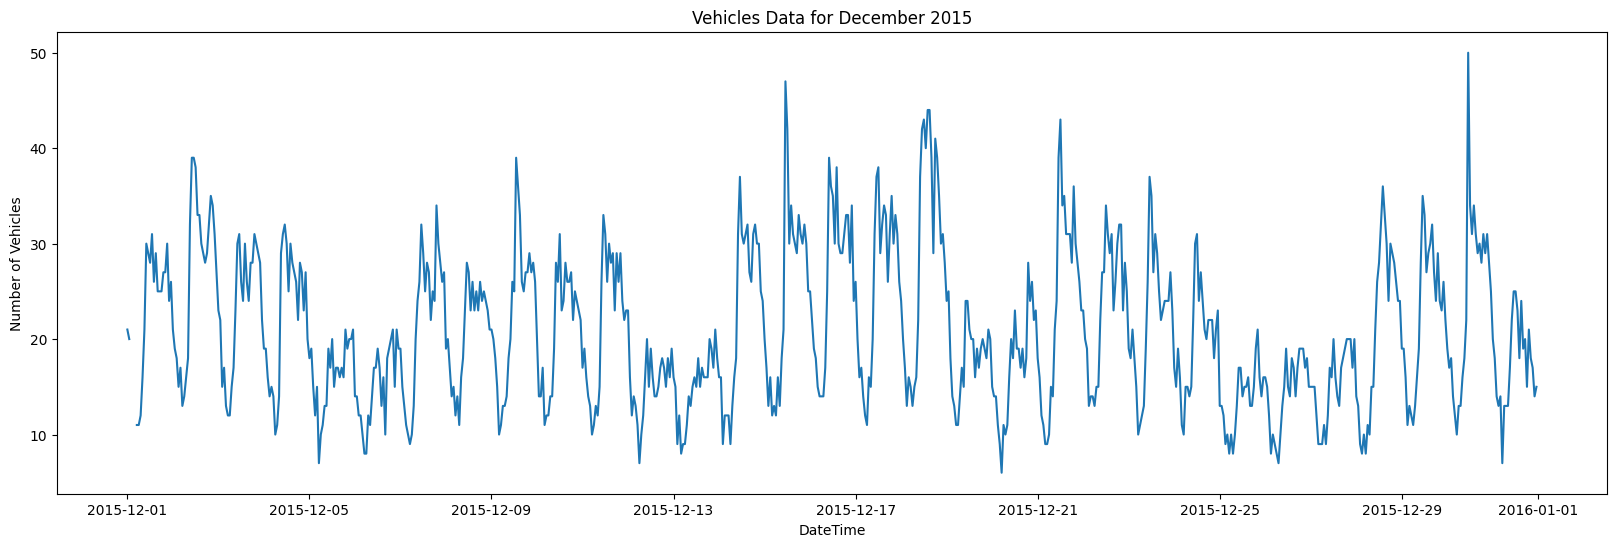

In [19]:
# Slice data for December 2015 (from 2015-12-01 to 2015-12-31 23:59:59)
december_df = resampled_df.loc['2015-12-01  00:00:00':'2015-12-31 23:59:59']

# Plot the data
plt.figure(figsize=(20, 6))
plt.plot(december_df.index, december_df['Vehicles'])
plt.title("Vehicles Data for December 2015")
plt.xlabel("DateTime")
plt.ylabel("Number of Vehicles")
plt.show()


In [20]:
resampled_df['day_of_week'] = resampled_df.index.day_of_week
resampled_df['hour'] = resampled_df.index.hour
resampled_df

,Vehicles,day_of_week,hour
DateTime,,,
2015-11-01 00:00:00,15.0,6,0
2015-11-01 01:00:00,13.0,6,1
2015-11-01 02:00:00,10.0,6,2
2015-11-01 03:00:00,7.0,6,3
2015-11-01 04:00:00,9.0,6,4
...,...,...,...
2017-06-30 19:00:00,105.0,4,19
2017-06-30 20:00:00,96.0,4,20
2017-06-30 21:00:00,90.0,4,21


In [21]:
masking = resampled_df['Vehicles'].isna()

[Rolling Average for handling missing data](https://drive.google.com/file/d/1oDWeEtmFbWui8BNjt4Z2HjikjnZ_kIJK/view?usp=sharing)

In [22]:
resampled_df.loc[masking, 'Vehicles'] = resampled_df.groupby(['day_of_week', 'hour'])['Vehicles'].transform(lambda x: x.rolling(window=12, min_periods=1).mean()).loc[masking]

In [23]:
## Check if there is any missing data
resampled_df.isnull().sum()

Vehicles       0
day_of_week    0
hour           0
dtype: int64

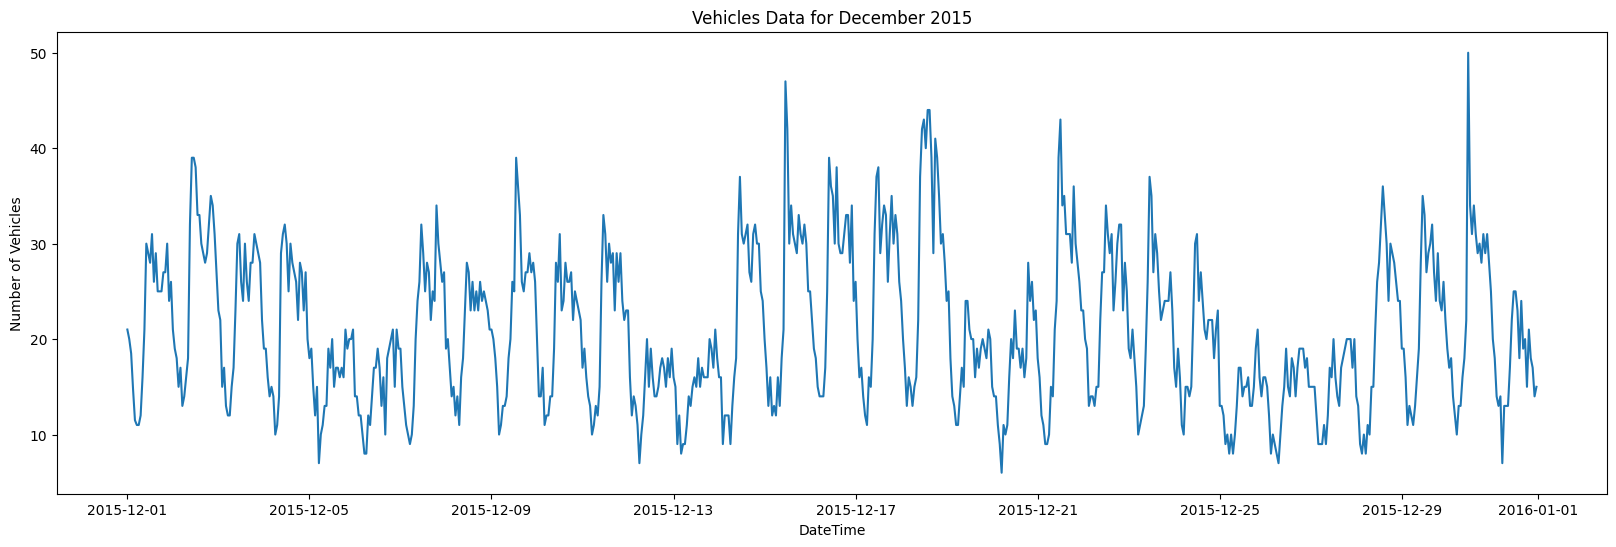

In [24]:
# Plot the time series data for December 2015 (re-plot)
plt.figure(figsize=(20, 6))
plt.plot(december_df.index, december_df['Vehicles'])
plt.title("Vehicles Data for December 2015")
plt.xlabel("DateTime")
plt.ylabel("Number of Vehicles")
plt.show()

### Identify Peak Traffic Hours

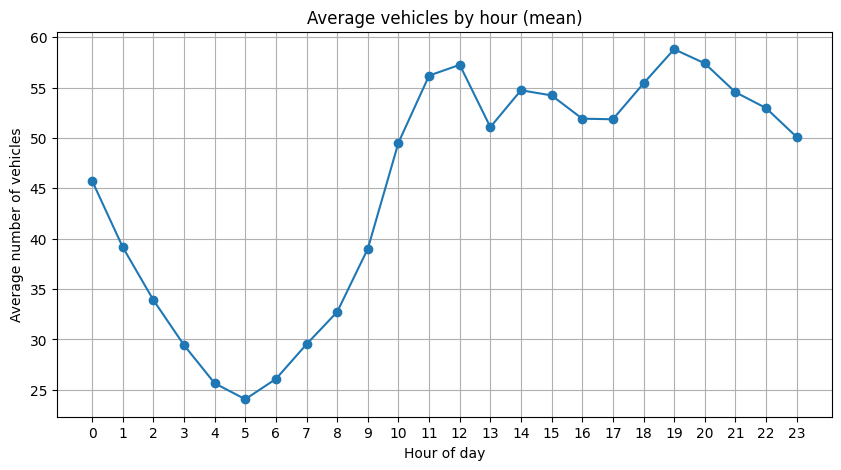

In [25]:
# Average vehicles by hour
hourly_mean = resampled_df.groupby(resampled_df.index.hour)['Vehicles'].mean()
plt.figure(figsize=(10,5))
hourly_mean.plot(marker='o')
plt.xlabel('Hour of day')
plt.ylabel('Average number of vehicles')
plt.title('Average vehicles by hour (mean)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

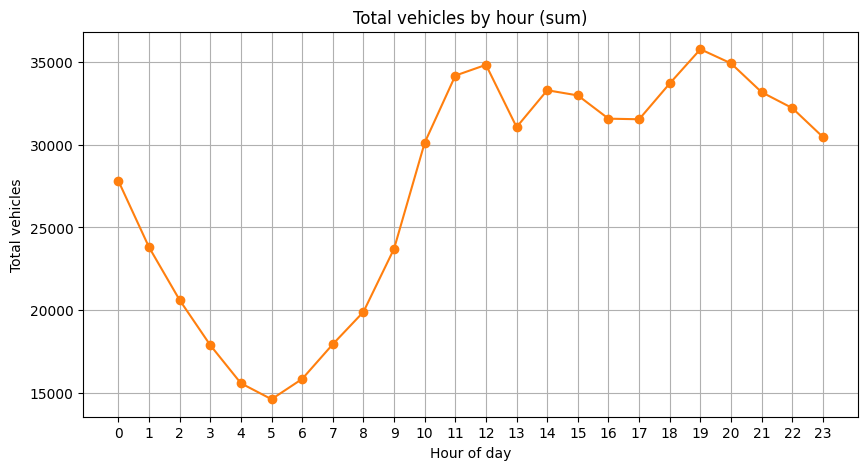

In [26]:
# Total vehicles by hour (sum)
hourly_sum = resampled_df.groupby(resampled_df.index.hour)['Vehicles'].sum()
plt.figure(figsize=(10,5))
hourly_sum.plot(marker='o', color='C1')
plt.xlabel('Hour of day')
plt.ylabel('Total vehicles')
plt.title('Total vehicles by hour (sum)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

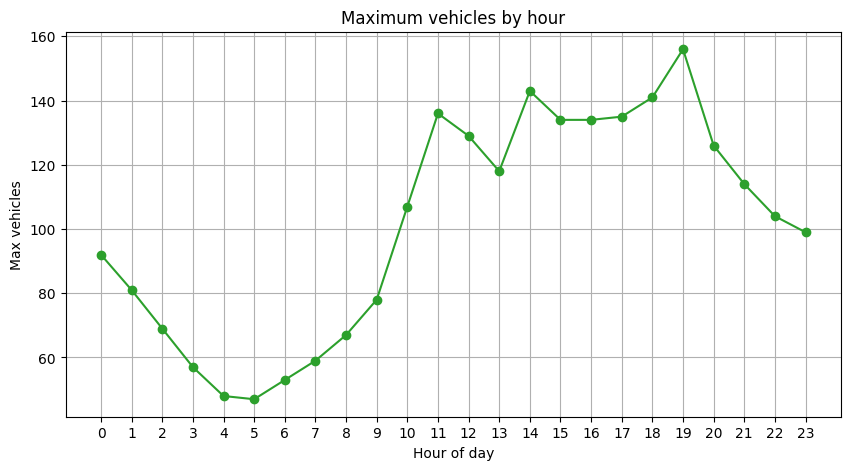

In [27]:
# Maximum vehicles by hour
hourly_max = resampled_df.groupby(resampled_df.index.hour)['Vehicles'].max()
plt.figure(figsize=(10,5))
hourly_max.plot(marker='o', color='C2')
plt.xlabel('Hour of day')
plt.ylabel('Max vehicles')
plt.title('Maximum vehicles by hour')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

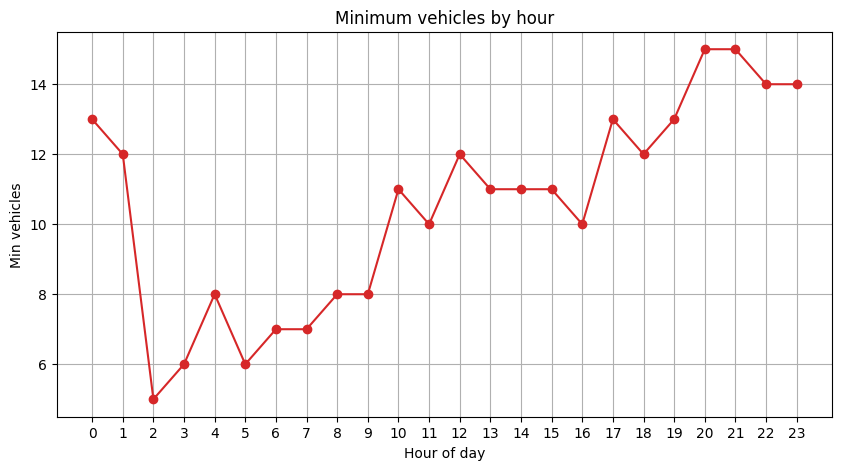

In [28]:
# Minimum vehicles by hour
hourly_min = resampled_df.groupby(resampled_df.index.hour)['Vehicles'].min()
plt.figure(figsize=(10,5))
hourly_min.plot(marker='o', color='C3')
plt.xlabel('Hour of day')
plt.ylabel('Min vehicles')
plt.title('Minimum vehicles by hour')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

In [29]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

C:\Users\acer\AppData\Local\Temp\ipykernel_15896\1565446183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


<Axes: title={'center': 'Seasonal Plot (day/hour)'}, xlabel='hour', ylabel='Vehicles'>

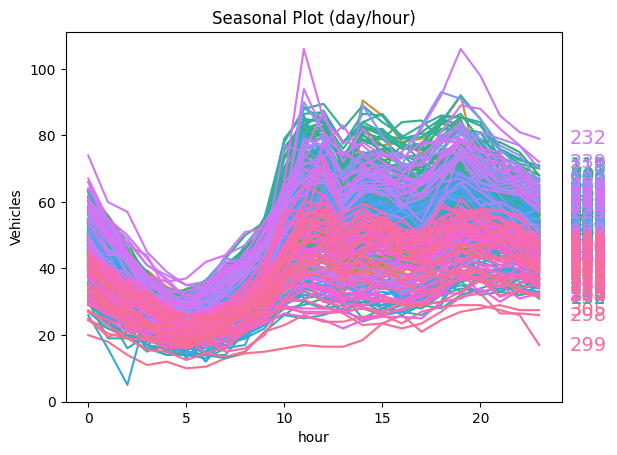

In [31]:
resampled_df['hour'] = resampled_df.index.hour
resampled_df['day'] = resampled_df.index.dayofyear
resampled_df['week'] = resampled_df.index.isocalendar().week
seasonal_plot(resampled_df, y="Vehicles", period="day", freq="hour")